<a href="https://colab.research.google.com/github/khanhtran0259/ImageCaptioning/blob/main/ImageCaption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!kaggle datasets download -d adityajn105/flickr8k

Dataset URL: https://www.kaggle.com/datasets/adityajn105/flickr8k
License(s): CC0-1.0
 99% 1.03G/1.04G [00:09<00:00, 154MB/s]
100% 1.04G/1.04G [00:09<00:00, 123MB/s]


In [2]:
import zipfile
import os

# Đường dẫn đến tệp zip đã tải xuống
zip_file = '/content/flickr8k.zip'  # Đường dẫn cụ thể phụ thuộc vào tên tệp bạn đã tải xuống

# Đường dẫn đến thư mục để giải nén
unzip_dir = '/content/flickr8k'

# Giải nén tệp zip
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(unzip_dir)

# Liệt kê các tệp trong thư mục đã giải nén
os.listdir(unzip_dir)


['Images', 'captions.txt']

In [3]:
import tensorflow as tf
import os
import random
import string
import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pathlib
from PIL import Image
from glob import glob
import cv2 as cv
import keras

In [6]:
image_path = '/content/flickr8k/Images/'
caption_path = '/content/flickr8k/captions.txt'

In [7]:
images = glob(image_path + "*.jpg")
len(images)


8091

In [8]:
def remove_punctuation(text):
    # Loại bỏ dấu câu từ văn bản
    return text.translate(str.maketrans('', '', string.punctuation))
def read_file_caption(file_path):
  clean_caption = {}

  with open(file_path, 'r') as file:
      lines = file.readlines()

        #Remove first line
      lines = lines[1:]

      for line in lines:
          # Lowercase and remove newline char
          image_name, caption = line.strip().split(',', 1)
          processed_line = caption.strip().lower().replace('\n', '')
          processed_line = remove_punctuation(processed_line)
          #removes leading and trailing whitespaces
          processed_line = processed_line.strip()

          #check line is empty or not before add to dictionary
          if processed_line:
              if image_name in clean_caption:
                  clean_caption[image_name].append(processed_line)
              else:
                  clean_caption[image_name] = [processed_line]

  return clean_caption

In [9]:
def generate_vocabulary(captions):
    vocab = set()

    for caption in captions.values():
        for cap in caption:
            # Tách các từ trong caption
            words = cap.split()
            # Thêm các từ vào vocab
            vocab.update(words)

    return vocab


In [10]:
captions = read_file_caption(caption_path)
print(captions.items())

dict_items([('1000268201_693b08cb0e.jpg', ['a child in a pink dress is climbing up a set of stairs in an entry way', 'a girl going into a wooden building', 'a little girl climbing into a wooden playhouse', 'a little girl climbing the stairs to her playhouse', 'a little girl in a pink dress going into a wooden cabin']), ('1001773457_577c3a7d70.jpg', ['a black dog and a spotted dog are fighting', 'a black dog and a tricolored dog playing with each other on the road', 'a black dog and a white dog with brown spots are staring at each other in the street', 'two dogs of different breeds looking at each other on the road', 'two dogs on pavement moving toward each other']), ('1002674143_1b742ab4b8.jpg', ['a little girl covered in paint sits in front of a painted rainbow with her hands in a bowl', 'a little girl is sitting in front of a large painted rainbow', 'a small girl in the grass plays with fingerpaints in front of a white canvas with a rainbow on it', 'there is a girl with pigtails sitt

In [11]:
vocabulary = generate_vocabulary(captions)
vocabulary

{'punches',
 'stones',
 'swampy',
 'groomsmen',
 'batshaped',
 'farm',
 'facepainted',
 'splash',
 'holder',
 'adventures',
 'fake',
 'longhandled',
 'elderly',
 'kitchen',
 'star',
 'parachuting',
 'waterside',
 'tubular',
 'ashtray',
 'marker',
 'gi',
 'nussle',
 'poised',
 'lunchbox',
 'dusty',
 'spiky',
 'heights',
 'neckties',
 'grasping',
 'downsteps',
 'suitcase',
 'denim',
 'finish',
 'conversing',
 'peircings',
 'acting',
 'reenactors',
 'admire',
 'obscuring',
 'rippling',
 'yellowsuited',
 'bun',
 'burrows',
 'shaking',
 'mosque',
 'dandelion',
 'batons',
 'streetway',
 'zipping',
 'anime',
 'swarm',
 'passin',
 'upper',
 'pouch',
 'dogshirt',
 'night',
 'wields',
 'slates',
 'armchair',
 'tball',
 'readies',
 'palmtree',
 'fist',
 'collapsable',
 'domes',
 'misty',
 'jackets',
 'astonishment',
 'car',
 'cot',
 'two',
 'corners',
 'barking',
 'jousting',
 'surrounding',
 'subdivsion',
 'lifts',
 'joyfully',
 'fully',
 'shallow',
 'its',
 'shotongoal',
 'parasailors',
 'cadet

In [12]:
def seperate_caption(captions):
    caption_only = []

    for key, captions in captions.items():
        caption_only.extend(captions)

    return caption_only

caption_only = seperate_caption(captions)

In [13]:
caption_only

['a child in a pink dress is climbing up a set of stairs in an entry way',
 'a girl going into a wooden building',
 'a little girl climbing into a wooden playhouse',
 'a little girl climbing the stairs to her playhouse',
 'a little girl in a pink dress going into a wooden cabin',
 'a black dog and a spotted dog are fighting',
 'a black dog and a tricolored dog playing with each other on the road',
 'a black dog and a white dog with brown spots are staring at each other in the street',
 'two dogs of different breeds looking at each other on the road',
 'two dogs on pavement moving toward each other',
 'a little girl covered in paint sits in front of a painted rainbow with her hands in a bowl',
 'a little girl is sitting in front of a large painted rainbow',
 'a small girl in the grass plays with fingerpaints in front of a white canvas with a rainbow on it',
 'there is a girl with pigtails sitting in front of a rainbow painting',
 'young girl with pigtails painting outside in the grass',

In [14]:
caption_with_tokens = [f'<start> {caption} <end>' for caption in caption_only]

In [15]:
caption_with_tokens

['<start> a child in a pink dress is climbing up a set of stairs in an entry way <end>',
 '<start> a girl going into a wooden building <end>',
 '<start> a little girl climbing into a wooden playhouse <end>',
 '<start> a little girl climbing the stairs to her playhouse <end>',
 '<start> a little girl in a pink dress going into a wooden cabin <end>',
 '<start> a black dog and a spotted dog are fighting <end>',
 '<start> a black dog and a tricolored dog playing with each other on the road <end>',
 '<start> a black dog and a white dog with brown spots are staring at each other in the street <end>',
 '<start> two dogs of different breeds looking at each other on the road <end>',
 '<start> two dogs on pavement moving toward each other <end>',
 '<start> a little girl covered in paint sits in front of a painted rainbow with her hands in a bowl <end>',
 '<start> a little girl is sitting in front of a large painted rainbow <end>',
 '<start> a small girl in the grass plays with fingerpaints in fr

In [17]:
from collections import Counter
vocab_count = Counter()
for caption in captions.values():
    for cap in caption:
        words = cap.split()
        vocab_count.update(words)
print(vocab_count)

Counter({'a': 62986, 'in': 18974, 'the': 18418, 'on': 10743, 'is': 9345, 'and': 8851, 'dog': 8136, 'with': 7765, 'man': 7265, 'of': 6713, 'two': 5638, 'white': 3940, 'black': 3832, 'boy': 3581, 'are': 3504, 'woman': 3402, 'girl': 3328, 'to': 3173, 'wearing': 3062, 'at': 2914, 'people': 2883, 'water': 2783, 'red': 2672, 'young': 2630, 'brown': 2563, 'an': 2432, 'his': 2357, 'blue': 2268, 'dogs': 2125, 'running': 2073, 'through': 2032, 'playing': 2008, 'while': 1968, 'down': 1825, 'shirt': 1806, 'standing': 1787, 'ball': 1779, 'little': 1768, 'grass': 1622, 'child': 1545, 'person': 1542, 'snow': 1492, 'jumping': 1472, 'over': 1414, 'front': 1386, 'three': 1381, 'sitting': 1368, 'holding': 1324, 'field': 1280, 'small': 1278, 'up': 1260, 'by': 1248, 'large': 1235, 'green': 1225, 'group': 1218, 'one': 1217, 'yellow': 1213, 'her': 1178, 'walking': 1165, 'children': 1156, 'men': 1121, 'into': 1074, 'air': 1058, 'beach': 1046, 'near': 1025, 'mouth': 989, 'jumps': 979, 'another': 956, 'for': 94

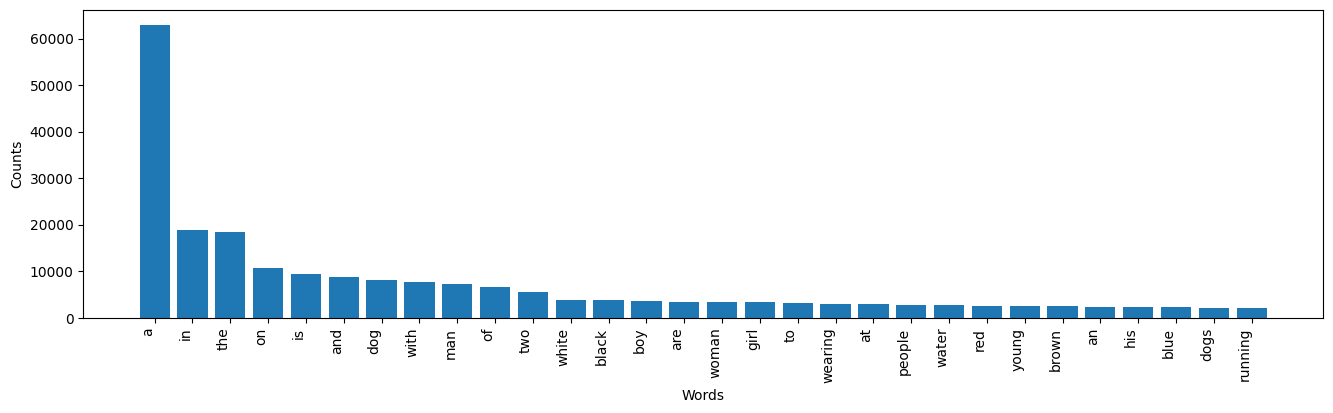

In [18]:
def plot_most_common_words(vocab_count, n=30):
    vocab_count = Counter(dict(vocab_count))
    words = [word for word, count in vocab_count.most_common(n)]
    counts = [count for word, count in vocab_count.most_common(n)]
    plt.figure(figsize=(16,4))
    plt.bar(words, counts)
    plt.style.use('fivethirtyeight')
    plt.xticks(rotation=90, ha='right')
    plt.xlabel('Words')
    plt.ylabel('Counts')
    plt.show()

plot_most_common_words(vocab_count)

In [19]:
top_word_count = 5000
filter_chars = '!"#$%&()*+.,-/:;=?@[\]^_`{|}~ '
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words= top_word_count ,oov_token="<unk>",filters=filter_chars)
tokenizer.fit_on_texts(caption_with_tokens)
train_seq = tokenizer.texts_to_sequences(caption_with_tokens)
print(train_seq[:5])
print(caption_with_tokens[:5])
print(f'OOV token{tokenizer.oov_token}')

[[3, 2, 43, 5, 2, 91, 171, 8, 120, 54, 2, 396, 13, 393, 5, 29, 1, 694, 4], [3, 2, 20, 315, 65, 2, 195, 118, 4], [3, 2, 41, 20, 120, 65, 2, 195, 2432, 4], [3, 2, 41, 20, 120, 6, 393, 21, 61, 2432, 4], [3, 2, 41, 20, 5, 2, 91, 171, 315, 65, 2, 195, 2995, 4]]
['<start> a child in a pink dress is climbing up a set of stairs in an entry way <end>', '<start> a girl going into a wooden building <end>', '<start> a little girl climbing into a wooden playhouse <end>', '<start> a little girl climbing the stairs to her playhouse <end>', '<start> a little girl in a pink dress going into a wooden cabin <end>']
OOV token<unk>


In [20]:
word_index = tokenizer.word_index
index_word = tokenizer.index_word

# Add Pad Token
tokenizer.word_index['<pad>'] = 0
tokenizer.index_word[0] = '<pad>'

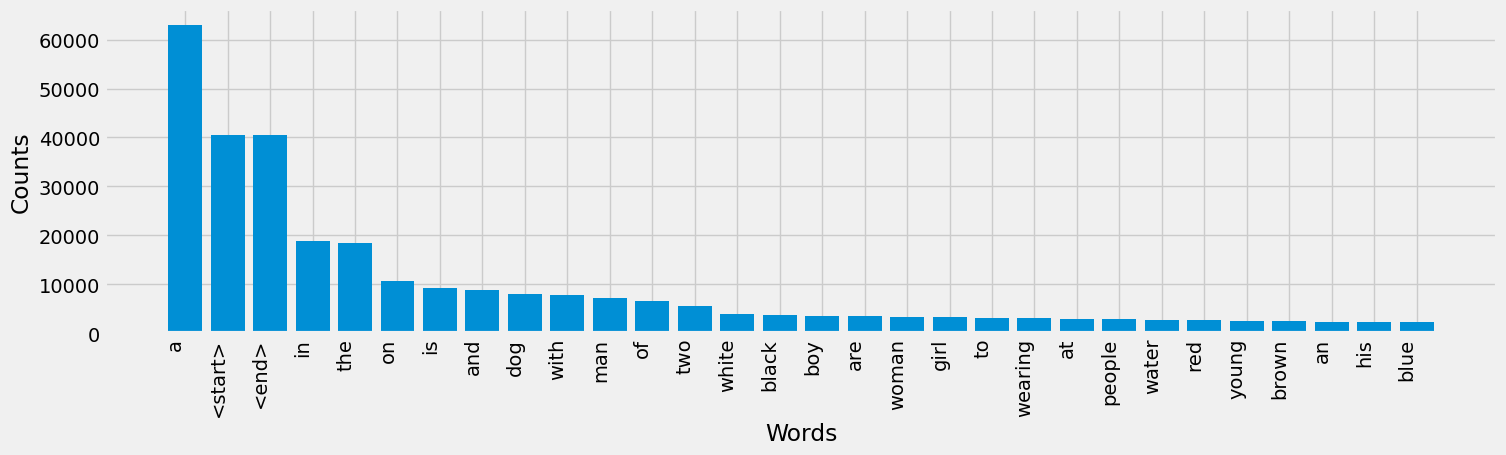

In [21]:
sort_word_by_count = sorted(tokenizer.word_counts.items(), key=lambda kv : kv[1], reverse= True)
plot_most_common_words(sort_word_by_count)

In [22]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
# Pad các caption đến chiều dài tối đa
max_length = max(len(seq) for seq in train_seq)
padded_sequences = pad_sequences(train_seq, maxlen=max_length, padding='post')

# Kiểm tra kết quả
# print("Các caption sau khi được token hóa và pad:")
# for seq in padded_sequences:
#     print(seq)
print(max_length)
print(padded_sequences.shape)

38
(40455, 38)


In [25]:
# Lưu trữ toàn bộ đường dẫn của các ảnh vào biến all_image_path
all_image_path = [image_path for image_path in images if image_path.endswith('.jpg')]
all_image_path = [image_path for image_path in images for _ in range(5)]
# Kiểm tra kết quả
for path in all_image_path:
    print(path)

# Lưu trữ kết quả vào biến all_image_path
all_image_path

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
/content/flickr8k/Images/1229756013_94663527d7.jpg
/content/flickr8k/Images/1229756013_94663527d7.jpg
/content/flickr8k/Images/1229756013_94663527d7.jpg
/content/flickr8k/Images/1229756013_94663527d7.jpg
/content/flickr8k/Images/1229756013_94663527d7.jpg
/content/flickr8k/Images/3707077198_efd6aa808d.jpg
/content/flickr8k/Images/3707077198_efd6aa808d.jpg
/content/flickr8k/Images/3707077198_efd6aa808d.jpg
/content/flickr8k/Images/3707077198_efd6aa808d.jpg
/content/flickr8k/Images/3707077198_efd6aa808d.jpg
/content/flickr8k/Images/3589267801_5a222e3a60.jpg
/content/flickr8k/Images/3589267801_5a222e3a60.jpg
/content/flickr8k/Images/3589267801_5a222e3a60.jpg
/content/flickr8k/Images/3589267801_5a222e3a60.jpg
/content/flickr8k/Images/3589267801_5a222e3a60.jpg
/content/flickr8k/Images/3610687607_895fdc94bd.jpg
/content/flickr8k/Images/3610687607_895fdc94bd.jpg
/content/flickr8k/Images/3610687607_895fdc94bd.jpg
/content/flickr8k/Images/

['/content/flickr8k/Images/369244499_752f0c1018.jpg',
 '/content/flickr8k/Images/369244499_752f0c1018.jpg',
 '/content/flickr8k/Images/369244499_752f0c1018.jpg',
 '/content/flickr8k/Images/369244499_752f0c1018.jpg',
 '/content/flickr8k/Images/369244499_752f0c1018.jpg',
 '/content/flickr8k/Images/2971431335_e192613db4.jpg',
 '/content/flickr8k/Images/2971431335_e192613db4.jpg',
 '/content/flickr8k/Images/2971431335_e192613db4.jpg',
 '/content/flickr8k/Images/2971431335_e192613db4.jpg',
 '/content/flickr8k/Images/2971431335_e192613db4.jpg',
 '/content/flickr8k/Images/899810584_61e1578d3f.jpg',
 '/content/flickr8k/Images/899810584_61e1578d3f.jpg',
 '/content/flickr8k/Images/899810584_61e1578d3f.jpg',
 '/content/flickr8k/Images/899810584_61e1578d3f.jpg',
 '/content/flickr8k/Images/899810584_61e1578d3f.jpg',
 '/content/flickr8k/Images/3275527950_41aca690a1.jpg',
 '/content/flickr8k/Images/3275527950_41aca690a1.jpg',
 '/content/flickr8k/Images/3275527950_41aca690a1.jpg',
 '/content/flickr8k/

In [27]:
unique_img_vector = sorted (set(all_image_path))
image_dataset = tf.data.Dataset.from_tensor_slices(unique_img_vector)

In [28]:
import concurrent.futures
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
import numpy as np
def preprocess_image(image_path):
    img = tf.io.read_file(image_path)  # Đọc tệp ảnh
    img = tf.image.decode_jpeg(img, channels=3)  # Giải mã ảnh JPEG
    img = tf.image.resize(img, (299, 299))  # Thay đổi kích thước ảnh
    img = tf.keras.applications.inception_v3.preprocess_input(img)  # Chuẩn hóa ảnh
    return img, image_path  # Trả về tensor ảnh và đường dẫn ảnh



In [29]:
image_dataset = image_dataset.map(preprocess_image, num_parallel_calls=tf.data.experimental.AUTOTUNE) \
                .batch(64)
image_dataset

<_BatchDataset element_spec=(TensorSpec(shape=(None, 299, 299, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None))>

In [30]:
image_model = tf.keras.applications.InceptionV3(include_top=False,weights='imagenet')

new_input =image_model.input
hidden_layer = image_model.layers[-1].output

image_features_extract_model =tf.keras.Model(new_input, hidden_layer)

87910968/87910968 [==============================] - 0s 0us/step


In [31]:
from tqdm import tqdm
for img, path in tqdm(image_dataset):
    batch_features = image_features_extract_model(img)
    batch_features = tf.reshape(batch_features,
                                  (batch_features.shape[0], -1, batch_features.shape[3]))

    for bf, p in zip(batch_features, path):
        path_of_feature = p.numpy().decode("utf-8")
        np.save(path_of_feature, bf.numpy())

100%|██████████| 127/127 [01:21<00:00,  1.55it/s]


In [32]:
print(len(all_image_path))
print(len(padded_sequences))

40455
40455


In [33]:
from sklearn.model_selection import train_test_split
path_train, path_test, cap_train, cap_test = train_test_split(all_image_path,padded_sequences,test_size=0.2,random_state=42)

In [34]:
# Checking the shape of train and Test data
print("Training data for images: " + str(len(path_train)))
print("Testing data for images: " + str(len(path_test)))
print("Training data for Captions: " + str(len(cap_train)))
print("Testing data for Captions: " + str(len(cap_test)))

Training data for images: 32364
Testing data for images: 8091
Training data for Captions: 32364
Testing data for Captions: 8091


In [35]:
def map_func(image, caption):
    img_tensor = np.load(image.decode('utf-8')+'.npy')
    return img_tensor,caption

In [36]:
def gen_dataset(image, caption,batch_size = 32,buffer_size=1000):

    dataset = tf.data.Dataset.from_tensor_slices((image, caption))

    # Use map to load the numpy files in parallel
    dataset = dataset.map(lambda item1, item2: tf.numpy_function(
            map_func, [item1, item2], [tf.float32, tf.int32]),
            num_parallel_calls=tf.data.AUTOTUNE)

    # Shuffle and batch
    dataset = dataset.shuffle(buffer_size).batch(batch_size)
    dataset = dataset.prefetch(buffer_size=tf.data.AUTOTUNE)

    return dataset

In [37]:
BATCH_SIZE=64
train_dataset=gen_dataset(path_train,cap_train,BATCH_SIZE)
test_dataset=gen_dataset(path_test,cap_test)

In [38]:
sample_img_batch, sample_cap_batch = next(iter(train_dataset))
print(sample_img_batch.shape)  #(batch_size, 8*8, 2048)
print(sample_cap_batch.shape) #(batch_size,max_len)

(64, 64, 2048)
(64, 38)


In [39]:
embedding_dim = 256
units = 512
vocab_size =5001 #top 5,000 words +1
train_num_steps = len(path_train) // BATCH_SIZE
test_num_steps = len(path_test) // BATCH_SIZE

In [40]:
class Encoder(tf.keras.Model):
    def __init__(self,embed_dim = 256):
        super(Encoder, self).__init__()
        self.dense = tf.keras.layers.Dense(embed_dim)#build your Dense layer with relu activation

    def call(self, features):
        features =  self.dense(features)# extract the features from the image shape: (batch, 8*8, embed_dim)
        features = tf.nn.relu(features)
        return features

In [41]:
encoder=Encoder(embedding_dim)

In [42]:
class Attention_model(tf.keras.Model):
    def __init__(self, units):
        super(Attention_model, self).__init__()
        self.W1 = tf.keras.layers.Dense(units)#build your Dense layer
        self.W2 = tf.keras.layers.Dense(units)#build your Dense layer
        self.V = tf.keras.layers.Dense(1)#build your final Dense layer with unit 1
        self.units=units

    def call(self, features, hidden):
        #features shape: (batch_size, 8*8, embedding_dim)
        # hidden shape: (batch_size, hidden_size)
        hidden_with_time_axis =  tf.expand_dims(hidden,1)# Expand the hidden shape to shape: (batch_size, 1, hidden_size)
        # attention_hidden_layer shape == (batch_size, 64, units)
        attention_hidden_layer = (tf.nn.tanh(self.W1(features) +
                                            self.W2(hidden_with_time_axis)))
        score = self.V(attention_hidden_layer)# build your score funciton to shape: (batch_size, 8*8, units)
        attention_weights =  tf.nn.softmax(score,axis=1)# extract your attention weights with shape: (batch_size, 8*8, 1)
        context_vector =  attention_weights * features#shape: create the context vector with shape (batch_size, 8*8,embedding_dim)
        context_vector =  tf.reduce_sum(context_vector, axis=1)# reduce the shape to (batch_size, embedding_dim)


        return context_vector, attention_weights

In [43]:
class Decoder(tf.keras.Model):
    def __init__(self, embed_dim, units, vocab_size):
        super(Decoder, self).__init__()
        self.units=units
        self.attention = Attention_model(self.units)#iniitalise your Attention model with units
        self.embed = tf.keras.layers.Embedding(vocab_size, embedding_dim)#build your Embedding layer
        self.gru = tf.keras.layers.GRU(self.units,return_sequences=True,return_state=True,recurrent_initializer='glorot_uniform')
        self.d1 = tf.keras.layers.Dense(self.units)#build your Dense layer
        self.d2 = tf.keras.layers.Dense(vocab_size)#build your Dense layer


    def call(self,x,features, hidden):
        context_vector, attention_weights = self.attention(features, hidden)#create your context vector & attention weights from attention model
        embed =  self.embed(x)# embed your input to shape: (batch_size, 1, embedding_dim)
        embed =  tf.concat([tf.expand_dims(context_vector, 1), embed], axis=-1)# Concatenate your input with the context vector from attention layer. Shape: (batch_size, 1, embedding_dim + embedding_dim)
        output,state = self.gru(embed)# Extract the output & hidden state from GRU layer. Output shape : (batch_size, max_length, hidden_size)
        output = self.d1(output)
        output = tf.reshape(output, (-1, output.shape[2])) # shape : (batch_size * max_length, hidden_size)
        output = self.d2(output) # shape : (batch_size * max_length, vocab_size)

        return output,state, attention_weights

    def init_state(self, batch_size):
        return tf.zeros((batch_size, self.units))

In [44]:
decoder=Decoder(embedding_dim, units, vocab_size)

In [45]:
features=encoder(sample_img_batch)

hidden = decoder.init_state(batch_size=sample_cap_batch.shape[0])
dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * sample_cap_batch.shape[0], 1)

predictions, hidden_out, attention_weights= decoder(dec_input, features, hidden)
print('Feature shape from Encoder: {}'.format(features.shape)) #(batch, 8*8, embed_dim)
print('Predcitions shape from Decoder: {}'.format(predictions.shape)) #(batch,vocab_size)
print('Attention weights shape from Decoder: {}'.format(attention_weights.shape)) #(batch, 8*8, embed_dim)

Feature shape from Encoder: (64, 64, 256)
Predcitions shape from Decoder: (64, 5001)
Attention weights shape from Decoder: (64, 64, 1)


In [46]:
optimizer = tf.keras.optimizers.Adam()
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True, reduction='none')

In [47]:
def loss_function(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss_ = loss_object(real, pred)

    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask

    return tf.reduce_mean(loss_)

In [48]:
# Creating Checkpoints
# checkpoint_path = "./checkpoints/train"
checkpoint_path = os.path.join("checkpoints","train")
ckpt = tf.train.Checkpoint(encoder=encoder,
                           decoder=decoder,
                           optimizer = optimizer)
ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)

In [49]:
start_epoch = 0
if ckpt_manager.latest_checkpoint:
    start_epoch = int(ckpt_manager.latest_checkpoint.split('-')[-1])

In [50]:
@tf.function
def train_step(img_tensor, target):
    loss = 0
    hidden = decoder.init_state(batch_size=target.shape[0])
    dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * target.shape[0], 1)

    with tf.GradientTape() as tape:
        features = encoder(img_tensor)
        for i in range(1,target.shape[1]):
            predictions,hidden,_ = decoder(dec_input,features,hidden)
            loss += loss_function(target[:,i], predictions)
            # using teacher forcing
            dec_input = tf.expand_dims(target[:, i], 1)

        avg_loss = (loss / int(target.shape[1]))
        trainable_variables = encoder.trainable_variables + decoder.trainable_variables
        gradients = tape.gradient(loss, trainable_variables)
        optimizer.apply_gradients(zip(gradients, trainable_variables))


    return loss, avg_loss

In [51]:
@tf.function
def test_step(img_tensor, target):
    loss = 0
    hidden = decoder.init_state(batch_size=target.shape[0])
    dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * target.shape[0], 1)

    with tf.GradientTape() as tape:
    #write your code here to do the training steps
        features = encoder(img_tensor)
        for i in range(1,target.shape[1]):
            predictions,hidden,_ = decoder(dec_input,features,hidden)
            loss += loss_function(target[:,i], predictions)
            predicted_id = tf.argmax(predictions,1)
            dec_input = tf.expand_dims(predicted_id, 1)

    avg_loss = (loss / int(target.shape[1]))

    return loss, avg_loss

In [52]:
def test_loss_cal(test_dataset):
    total_loss = 0


    for (batch,(img_tensor,target)) in enumerate(test_dataset):
        batch_loss,t_loss = test_step(img_tensor,target)
        total_loss += t_loss
    return total_loss/test_num_steps

In [53]:
#Lets fit the model
import time
loss_plot = []
test_loss_plot = []
EPOCHS = 15

best_test_loss=100
for epoch in tqdm(range(0, EPOCHS)):
    start = time.time()
    total_loss = 0

    for (batch, (img_tensor, target)) in enumerate(train_dataset):
        batch_loss, t_loss = train_step(img_tensor, target)
        total_loss += t_loss
        avg_train_loss=total_loss / train_num_steps

    loss_plot.append(avg_train_loss)
    test_loss = test_loss_cal(test_dataset)
    test_loss_plot.append(test_loss)

    print ('For epoch: {}, the train loss is {:.3f}, & test loss is {:.3f}'.format(epoch+1,avg_train_loss,test_loss))
    print ('Time taken for 1 epoch {} sec\n'.format(time.time() - start))

    if test_loss < best_test_loss:
        print('Test loss has been reduced from %.3f to %.3f' % (best_test_loss, test_loss))
        best_test_loss = test_loss
        ckpt_manager.save()

  0%|          | 0/15 [00:00<?, ?it/s]

For epoch: 1, the train loss is 1.358, & test loss is 4.517
Time taken for 1 epoch 205.2753882408142 sec

Test loss has been reduced from 100.000 to 4.517


 13%|█▎        | 2/15 [04:49<29:02, 134.02s/it]

For epoch: 2, the train loss is 1.137, & test loss is 4.621
Time taken for 1 epoch 83.92122864723206 sec



 20%|██        | 3/15 [06:14<22:20, 111.73s/it]

For epoch: 3, the train loss is 1.078, & test loss is 4.611
Time taken for 1 epoch 85.20899057388306 sec



 27%|██▋       | 4/15 [07:41<18:41, 101.95s/it]

For epoch: 4, the train loss is 1.039, & test loss is 4.569
Time taken for 1 epoch 86.95056557655334 sec



 33%|███▎      | 5/15 [09:19<16:43, 100.32s/it]

For epoch: 5, the train loss is 1.003, & test loss is 4.632
Time taken for 1 epoch 97.42632508277893 sec



 40%|████      | 6/15 [11:00<15:05, 100.64s/it]

For epoch: 6, the train loss is 0.965, & test loss is 4.654
Time taken for 1 epoch 101.22689533233643 sec



 47%|████▋     | 7/15 [12:47<13:41, 102.73s/it]

For epoch: 7, the train loss is 0.926, & test loss is 4.672
Time taken for 1 epoch 107.0321409702301 sec



 53%|█████▎    | 8/15 [14:30<12:00, 102.87s/it]

For epoch: 8, the train loss is 0.885, & test loss is 4.690
Time taken for 1 epoch 103.15040302276611 sec



 60%|██████    | 9/15 [16:13<10:16, 102.78s/it]

For epoch: 9, the train loss is 0.842, & test loss is 4.694
Time taken for 1 epoch 102.57749056816101 sec



 67%|██████▋   | 10/15 [17:51<08:26, 101.33s/it]

For epoch: 10, the train loss is 0.802, & test loss is 4.778
Time taken for 1 epoch 98.07760405540466 sec



 73%|███████▎  | 11/15 [19:32<06:45, 101.36s/it]

For epoch: 11, the train loss is 0.762, & test loss is 4.908
Time taken for 1 epoch 101.41706824302673 sec



 80%|████████  | 12/15 [21:22<05:12, 104.01s/it]

For epoch: 12, the train loss is 0.723, & test loss is 4.951
Time taken for 1 epoch 110.07375955581665 sec



 87%|████████▋ | 13/15 [23:17<03:34, 107.26s/it]

For epoch: 13, the train loss is 0.691, & test loss is 5.117
Time taken for 1 epoch 114.71699953079224 sec



 93%|█████████▎| 14/15 [25:06<01:47, 107.71s/it]

For epoch: 14, the train loss is 0.656, & test loss is 5.204
Time taken for 1 epoch 108.7576789855957 sec



100%|██████████| 15/15 [26:49<00:00, 107.30s/it]

For epoch: 15, the train loss is 0.624, & test loss is 5.352
Time taken for 1 epoch 103.19251418113708 sec



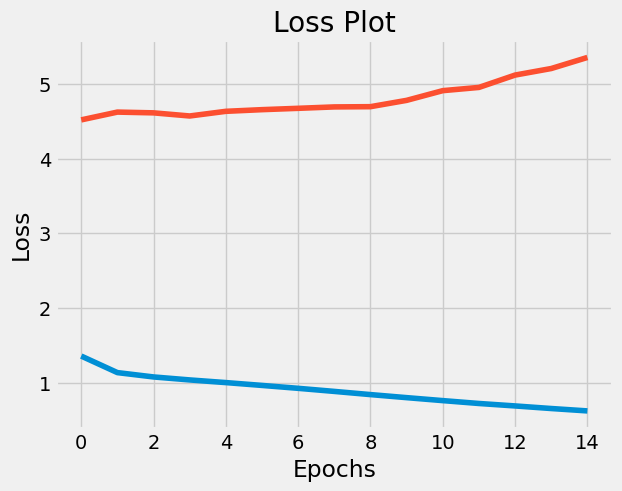

In [54]:
plt.plot(loss_plot)
plt.plot(test_loss_plot)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Plot')
plt.show()

In [61]:
attention_features_shape = 64

def evaluate(image):
    attention_plot = np.zeros((max_length, attention_features_shape))

    hidden = decoder.init_state(batch_size=1)

    temp_input = tf.expand_dims(preprocess_image(image)[0], 0) #process the input image to desired format before extracting features
    img_tensor_val = image_features_extract_model(temp_input)# Extract features using our feature extraction model
    img_tensor_val = tf.reshape(img_tensor_val, (img_tensor_val.shape[0], -1, img_tensor_val.shape[3]))

    features = encoder(img_tensor_val)# extract the features by passing the input to encoder

    dec_input = tf.expand_dims([tokenizer.word_index['<start>']], 0)
    result = []

    for i in range(max_length):
        predictions, hidden, attention_weights = decoder(dec_input,
                                                         features,
                                                         hidden)# get the output from decoder

        attention_plot[i] = tf.reshape(attention_weights, (-1, )).numpy()

        predicted_id = tf.random.categorical(predictions, 1)[0][0].numpy()#extract the predicted id(embedded value) which carries the max value
        result.append(tokenizer.index_word[predicted_id])
        #map the id to the word from tokenizer and append the value to the result list

        if tokenizer.index_word[predicted_id] == '<end>':
            return result, attention_plot,predictions

        dec_input = tf.expand_dims([predicted_id], 0)

    attention_plot = attention_plot[:len(result), :]
    return result, attention_plot,predictions

In [62]:
from PIL import Image
def plot_attmap(caption, weights, image):

    fig = plt.figure(figsize=(10, 10))
    temp_img = np.array(Image.open(image))

    len_cap = len(caption)
    for cap in range(len_cap):
        weights_img = np.reshape(weights[cap], (8,8))
        weights_img = np.array(Image.fromarray(weights_img).resize((224, 224), Image.LANCZOS))

        ax = fig.add_subplot(len_cap//2, len_cap//2, cap+1)
        ax.set_title(caption[cap], fontsize=15)

        img=ax.imshow(temp_img)

        ax.imshow(weights_img, cmap='gist_heat', alpha=0.6,extent=img.get_extent())
        ax.axis('off')
    plt.subplots_adjust(hspace=0.2, wspace=0.2)
    plt.show()

In [63]:
from nltk.translate.bleu_score import sentence_bleu

In [64]:
def filt_text(text):
    filt=['<start>','<unk>','<end>']
    temp= text.split()
    [temp.remove(j) for k in filt for j in temp if k==j]
    text=' '.join(temp)
    return text

In [65]:
def test_caption_generation(img_test):


    rid = np.random.randint(0, len(img_test))
    test_image = img_test[rid]
    #test_image = './images/413231421_43833a11f5.jpg'
    #real_caption = '<start> black dog is digging in the snow <end>'

    real_caption = ' '.join(
        tokenizer.index_word[i] for i in cap_test[rid] if i not in [0]
    )

    result, attention_plot,pred_test = evaluate(test_image)


    real_caption=filt_text(real_caption)


    pred_caption=' '.join(result).rsplit(' ', 1)[0]

    real_appn = [real_caption.split()]
    reference = real_appn
    candidate = pred_caption.split()

    print ('Real Caption:', real_caption)
    print ('Prediction Caption:', pred_caption)

    score1 = sentence_bleu(reference, candidate, weights=(1,0,0,0))
    score2 = sentence_bleu(reference, candidate, weights=(0,1,0,0))
    score3 = sentence_bleu(reference, candidate, weights=(0,0,1,0))
    score4 = sentence_bleu(reference, candidate, weights=(0,0,0,1))
    print("\nBELU score: ")
    print(f"Individual 1-gram: {score1*100}")
    print(f"Individual 2-gram: {score2*100}")
    print(f"Individual 3-gram: {score3*100}")
    print(f"Individual 4-gram: {score4*100}")

    plot_attmap(result, attention_plot, test_image)


    Image.open(test_image)

In [67]:
# Function to run the model on Test Image
def Prediction_Unknown_data(test_image):
    #Testing on test image
    openImg = test_image
    result, attention_plot,pred_test = evaluate(test_image)
    pred_caption=' '.join(result).rsplit(' ', 1)[0]

    candidate = pred_caption.split()

    print ('Prediction Caption:', pred_caption)
    print ('')
    newsize = (800, 800)
    im = Image.open(openImg).resize(newsize)
    width, height = im.size
    print(width,height)
    div=3
    if width > 3000:
        div=10
    im = im.resize((width//div, height//div))



    return im,pred_caption

Real Caption: two dogs run through the water and both hold the same toy in their mouths
Prediction Caption: two dogs play in the ocean

BELU score: 
Individual 1-gram: 14.875344009895318
Individual 2-gram: 4.462603202968596
Individual 3-gram: 4.9648108639081006e-307
Individual 4-gram: 4.9648108639081006e-307


/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


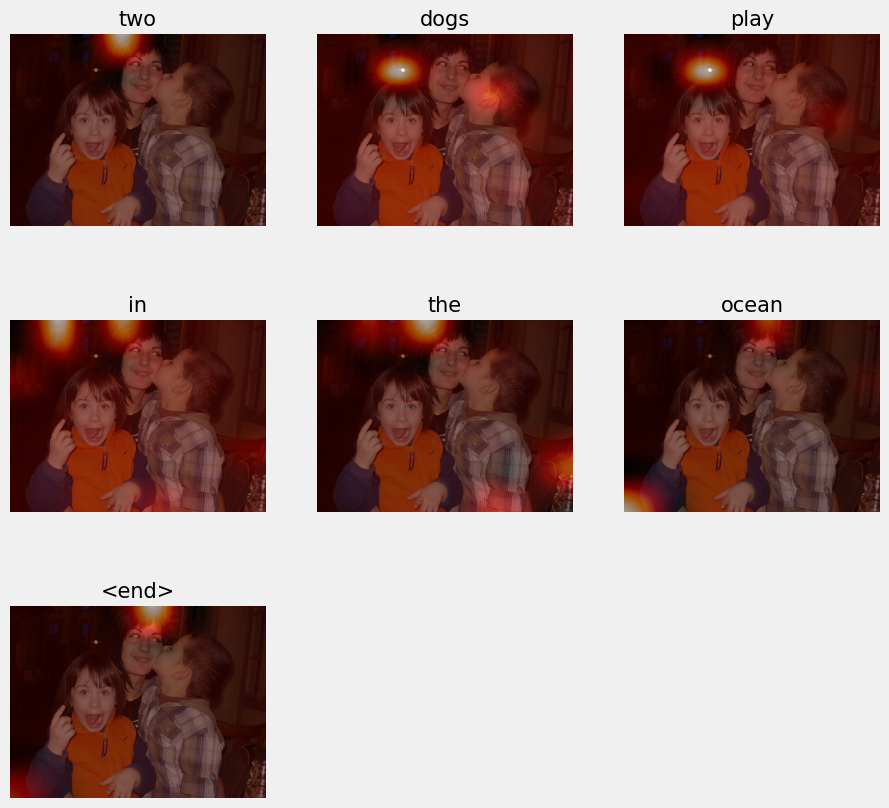

In [72]:
test_caption_generation(path_test)